In [217]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [218]:
# importing data
df=pd.read_csv('carprice.csv')

In [219]:
df.drop('car_ID',axis=1,inplace=True)
df.drop('CarName',axis=1,inplace=True)

In [220]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [221]:
# encoding the categorical data
from sklearn.preprocessing import OrdinalEncoder

In [222]:
oe=OrdinalEncoder()

In [223]:
df.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [224]:
df[['enginetype','cylindernumber']]

,enginetype,cylindernumber
0,dohc,four
1,dohc,four
2,ohcv,six
3,ohc,four
4,ohc,five
...,...,...
200,ohc,four
201,ohc,four
202,ohcv,six
203,ohc,six


In [225]:
df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem','enginetype','cylindernumber']]=oe.fit_transform(df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem','enginetype','cylindernumber']])

In [226]:
# normalizing the data
from sklearn.preprocessing import MinMaxScaler

In [227]:
normal=MinMaxScaler()

In [228]:
#copying column names, beacause at the time of normalizing it converts the column names into numerical
columns=df.columns

In [229]:
df=normal.fit_transform(df)

In [230]:
# convert array into data frame

df=pd.DataFrame(df,columns=columns)

# running test(predicting)

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
x=df.drop('price',axis=1)
y=df.price

In [233]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,1.0,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.6,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,0.449254,0.433333,...,0.343396,0.714286,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.8,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,0.529851,0.491667,...,0.181132,0.714286,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.8,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,0.529851,0.508333,...,0.283019,0.714286,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.301887,0.714286,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.2,1.0,1.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.708333,...,0.301887,0.714286,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.2,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.422642,0.714286,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.2,0.0,1.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,...,0.316981,0.428571,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


In [234]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)

In [235]:
from sklearn.linear_model import LinearRegression

In [236]:
lr=LinearRegression()

In [237]:
lr.fit(x_train,y_train)

LinearRegression()

In [238]:
y_pred=lr.predict(x_test)

In [239]:
from sklearn.metrics import r2_score

In [240]:
r2_score(y_test,y_pred)

0.785751295769596

<Axes: >

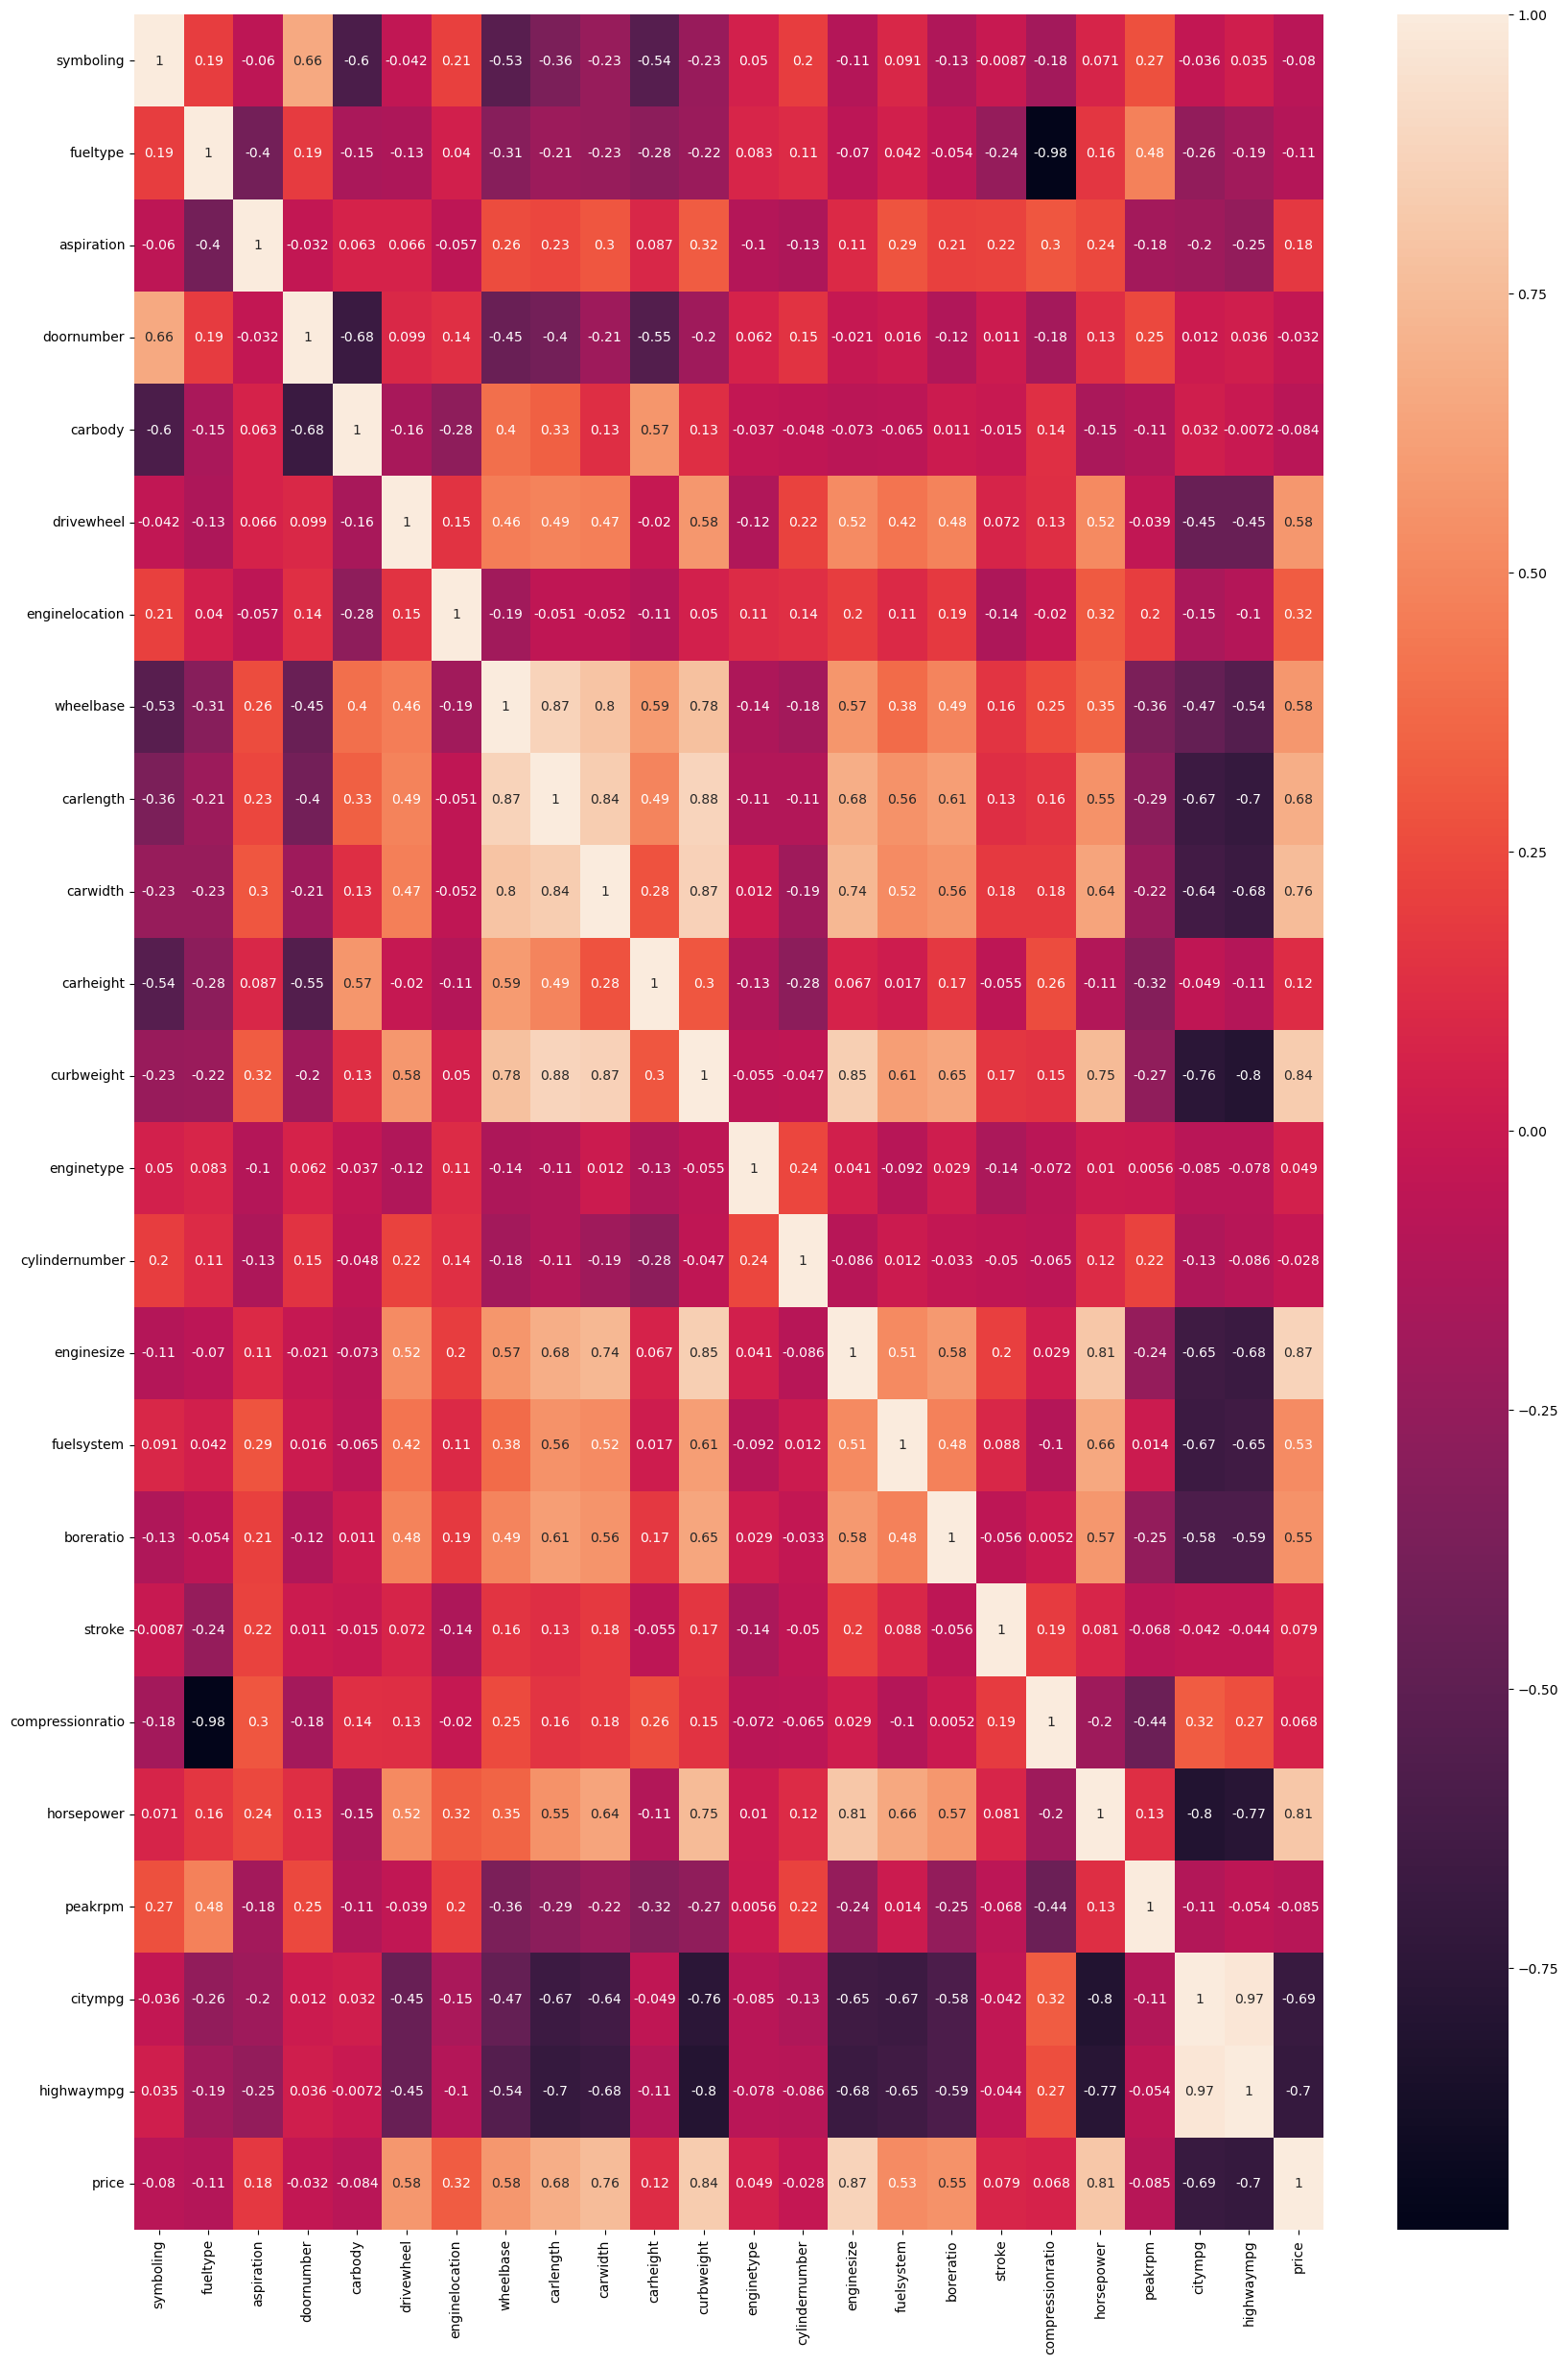

In [241]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(numeric_only=True),annot=True)